In [3]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load CSV
df = pd.read_csv("./ML Path/house price prediction/data.csv")

# Step 3: View top rows
print(df.head())

# Step 4: Basic shape and info
print("Dataset shape:", df.shape)
print("\nColumn Info:")
print(df.info())


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
df.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations with target variable
correlation_matrix = df.corr(numeric_only=True)
top_corr = correlation_matrix['price'].sort_values(ascending=False)

print("Top correlated features with price:\n", top_corr)


Top correlated features with price:
 price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


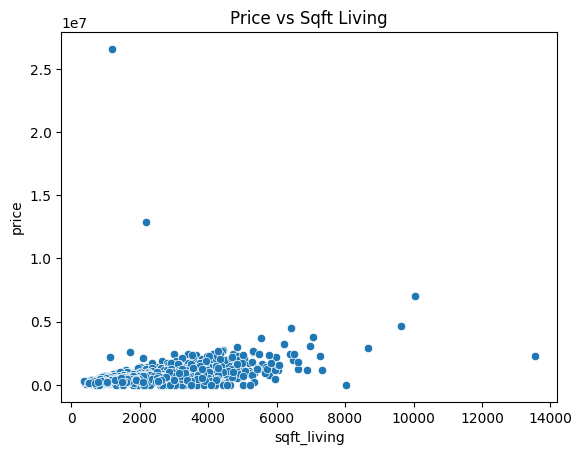

In [11]:
# Scatter plot for a strong correlated feature
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title("Price vs Sqft Living")
plt.show()


<Axes: xlabel='bedrooms', ylabel='price'>

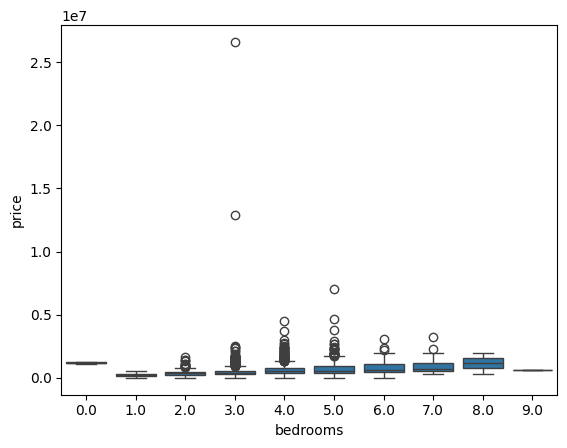

In [13]:
sns.boxplot(x='bedrooms', y='price', data=df)


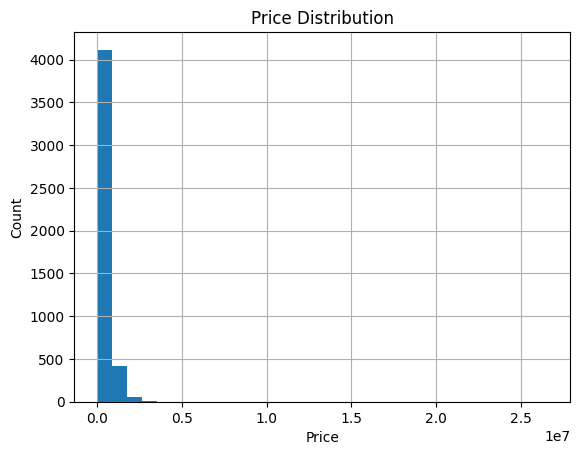

In [15]:
df['price'].hist(bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


In [47]:
features = [
    'sqft_living',
    'bathrooms',
    'view',
    'bedrooms',
    'floors',
    'waterfront'
]

X = df[features]
y = df['price']



In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.029564383465150113
Mean Absolute Error: 219174.36217643638
Root Mean Squared Error: 994834.2634897


In [55]:
new_house_df = pd.DataFrame([{
    'sqft_living': 2500,
    'bathrooms': 2.5,
    'view': 1,
    'bedrooms': 3,
    'floors': 2,
    'waterfront': 0
}])

predicted_price = model.predict(new_house_df)
print(f"Predicted House Price: ${predicted_price[0]:,.2f}")

Predicted House Price: $716,992.55


In [57]:
print("Model was trained on features:", list(X_train.columns))
print("New data columns:", list(new_house_df.columns))


Model was trained on features: ['sqft_living', 'bathrooms', 'view', 'bedrooms', 'floors', 'waterfront']
New data columns: ['sqft_living', 'bathrooms', 'view', 'bedrooms', 'floors', 'waterfront']


In [59]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Pair coefficients with feature names
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef}")


Intercept: 92239.6473839811
Coefficients: [ 2.77925441e+02 -9.25011621e+03  6.03990892e+04 -5.09375509e+04
  2.27390779e+04  3.95752063e+05]
sqft_living: 277.9254408908953
bathrooms: -9250.11620924682
view: 60399.08924758831
bedrooms: -50937.5509228635
floors: 22739.077874113747
waterfront: 395752.0633371748
